<a href="https://colab.research.google.com/github/badrinarayanan02/deep_learning/blob/main/2348507_DLLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilayered Perceptrons**

Working for a financial institution that is concerned about fraudulent transactions on its
credit card platform. Task is to develop a predictive model using Multilayer Perceptrons
(MLPs) with Keras/TensorFlow to detect fraudulent transactions based on transaction features.

Design an MLP model architecture using Keras/TensorFlow to classify credit card transactions as fraudulent or not. Consider appropriate activation functions, number of layers, and neurons in each layer.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

In [3]:
trans_data = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
trans_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
trans_data.shape

(1296675, 23)

In [5]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
trans_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Inference:** There is no null values in the dataset

In [7]:
trans_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

**Visualization**

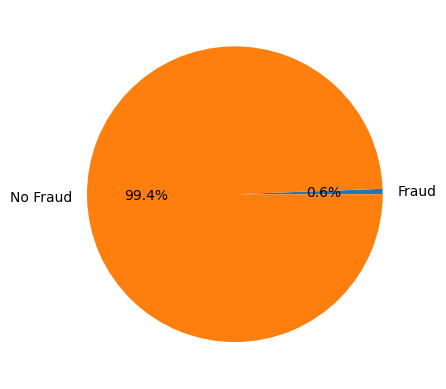

In [8]:
labels = 'Fraud', 'No Fraud'
sizes = [trans_data['is_fraud'].value_counts()[1], trans_data['is_fraud'].value_counts()[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

**Inference:** The count of not fraud is more than fraud transactions

In [9]:
trans_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Distribution of fraud vs non fraud before smoting

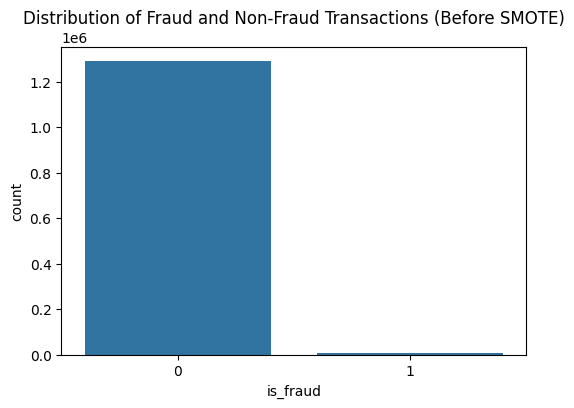

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=trans_data)
plt.title('Distribution of Fraud and Non-Fraud Transactions (Before SMOTE)')
plt.show()

In [11]:
trans_data["trans_date_trans_time"] = pd.to_datetime(trans_data["trans_date_trans_time"])
trans_data["dob"] = pd.to_datetime(trans_data["dob"])
trans_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


Dropping unwanted features

In [12]:
trans_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
trans_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


Separating features and target variable

In [13]:
X = trans_data.drop('is_fraud',axis = 1)
y = trans_data['is_fraud']

# **Data Preprocessing**

In [14]:
numericalFeatures = X.select_dtypes(include=['float64']).columns.tolist()
categoricalFeatures = X.select_dtypes(include=['object']).columns.tolist()

Defining Transformers

In [15]:
numericalTransformer = StandardScaler()
categoricalTransformer = OneHotEncoder(drop='first')

Combining transformers using ColumnTransformer

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericalTransformer, numericalFeatures),
        ('cat', categoricalTransformer, categoricalFeatures)
    ])

Splitting the data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Performing Smoting to solve the class imbalance issue - oversampling

In [21]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train),y_train)

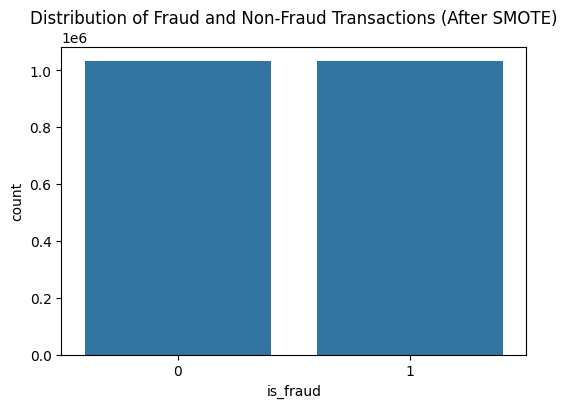

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Fraud and Non-Fraud Transactions (After SMOTE)')
plt.show()

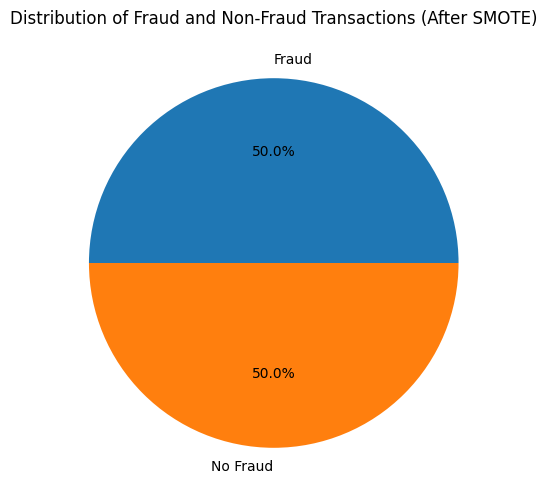

In [23]:
sizes_resampled = [sum(y_train_resampled == 1), sum(y_train_resampled == 0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes_resampled, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Fraud and Non-Fraud Transactions (After SMOTE)')
plt.show()

**Inference:** Now the class imbalance issue is solved by using SMOTE technique.

# **MLP Model Architecture**

In [30]:
num_samples = min(X_train_resampled.getnnz(), 1000)
X_train_subset = X_train_resampled[:num_samples].toarray()
y_train_subset = y_train_resampled[:num_samples]

**Inference:** Gave a subset of data for training the model, because of a larger dataset.

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

**Inference**

The first dense layer has 64 neurons and uses the ReLU (Rectified Linear Unit) activation function. ReLU is a common choice for hidden layers as it introduces non-linearity to the model.

The second dense layer has 32 neurons with ReLU activation.

The third dense layer has 1 neuron and uses the sigmoid activation function.


Compiling the model

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model

In [33]:
model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
15/15 [==============================] - 6s 53ms/step - loss: 0.6116 - accuracy: 0.9733 - val_loss: 0.5232 - val_accuracy: 0.9900
Epoch 2/10
15/15 [==============================] - 0s 18ms/step - loss: 0.4364 - accuracy: 0.9978 - val_loss: 0.3397 - val_accuracy: 0.9900
Epoch 3/10
15/15 [==============================] - 0s 15ms/step - loss: 0.2412 - accuracy: 0.9978 - val_loss: 0.1699 - val_accuracy: 0.9900
Epoch 4/10
15/15 [==============================] - 0s 20ms/step - loss: 0.0988 - accuracy: 0.9978 - val_loss: 0.0871 - val_accuracy: 0.9900
Epoch 5/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0410 - accuracy: 0.9978 - val_loss: 0.0619 - val_accuracy: 0.9900
Epoch 6/10
15/15 [==============================] - 0s 17ms/step - loss: 0.0227 - accuracy: 0.9978 - val_loss: 0.0550 - val_accuracy: 0.9900
Epoch 7/10
15/15 [==============================] - 0s 15ms/step - loss: 0.0160 - accuracy: 0.9978 - val_loss: 0.0514 - val_accuracy: 0.9900
Epoch 8/10
15

**Inference:** Loss is decreasig after every epoch, this is a good sign.

Evaluating the model on testing set

In [34]:
y_pred = model.predict(preprocessor.transform(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

8105/8105 [==============================] - 19s 2ms/step


Evaluation Metrics

In [40]:
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.9941
ROC-AUC Score: 0.7628


Confusion Matrix

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

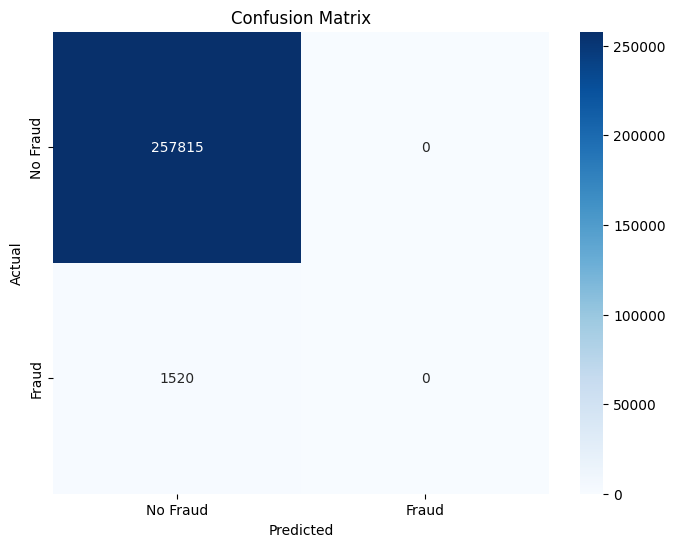

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Precision Recall Curve

In [42]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)

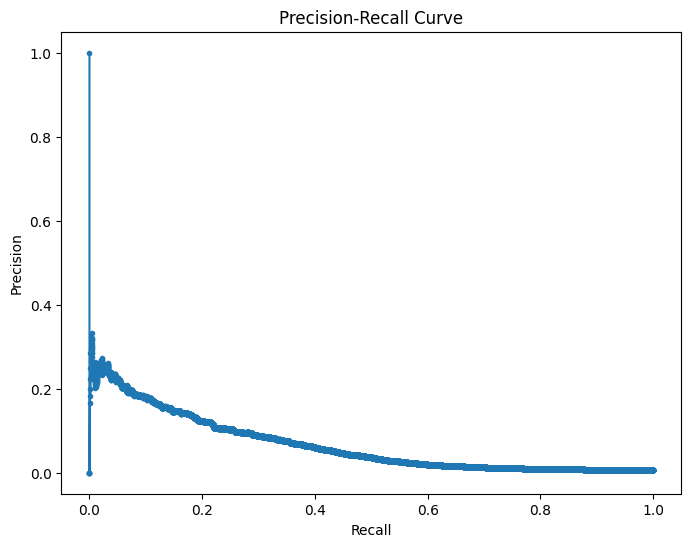

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**Using MiniBatch SGD as an optimizer**

In [46]:
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate and momentum
model.compile(optimizer=optimizer_sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
history_sgd = model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0446 - val_accuracy: 0.9900
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0448 - val_accuracy: 0.9900
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0431 - val_accuracy: 0.9900
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0427 - val_accuracy: 0.9900
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0415 - val_accuracy: 0.9900
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0404 - val_accuracy: 0.9900
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0402 - val_accuracy: 0.9900
Epoch 8/10
15/15 

In [52]:
evaluation_sgd = model.evaluate(X_train_subset, y_train_subset)
print(f"Validation Loss (Mini-Batch SGD): {evaluation_sgd[0]}")
print(f"Validation Accuracy (Mini-Batch SGD): {evaluation_sgd[1]}")

32/32 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9970
Validation Loss (Mini-Batch SGD): 0.008900824002921581
Validation Accuracy (Mini-Batch SGD): 0.996999979019165


**Inference:** Loss is very less and the accuracy of the model is also fine.

In [53]:
y_pred_sgd = (model.predict(X_train_subset) > 0.5).astype("int32")

precision_sgd = precision_score(y_train_subset, y_pred_sgd)
recall_sgd = recall_score(y_train_subset, y_pred_sgd)
f1_sgd = f1_score(y_train_subset, y_pred_sgd)
confusion_matrix_sgd = confusion_matrix(y_train_subset, y_pred_sgd)

print(f"Precision (Mini-Batch SGD): {precision_sgd}")
print(f"Recall (Mini-Batch SGD): {recall_sgd}")
print(f"F1 Score (Mini-Batch SGD): {f1_sgd}")
print(f"Confusion Matrix (Mini-Batch SGD):\n{confusion_matrix_sgd}")

32/32 [==============================] - 0s 1ms/step
Precision (Mini-Batch SGD): 0.0
Recall (Mini-Batch SGD): 0.0
F1 Score (Mini-Batch SGD): 0.0
Confusion Matrix (Mini-Batch SGD):
[[997   0]
 [  3   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Inference:** Previously used Adam Optimizer, now used Mini batch SGD as an optimizer. Accuracy is good. And after each epoch the error is decreasing.

# **Conclusion**

Thus the task to create a model using multilayer perceptron to classify fraudulent transactions has been implemented successfully. The model is giving good accuracy, initially there was a class imbalance issue, overcame the issue by using SMOTE technique. And at last used different optimizer techniques such as adam, minibatch SGD. Evaluated the model too.